# Simple Linear Regression - Single Input

In [76]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

In [77]:
# model
def model(x, w, b):
    y = w*x + b
    return y

In [78]:
# cost function
def compute_cost(x, y, w, b):
    # J function
    e = y - model(x, w, b)  # (w*x+b)
    m = x.shape[0]
    total_cost = (1/(2 * m)) * sum(e**2)
    return total_cost

In [79]:
# data
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

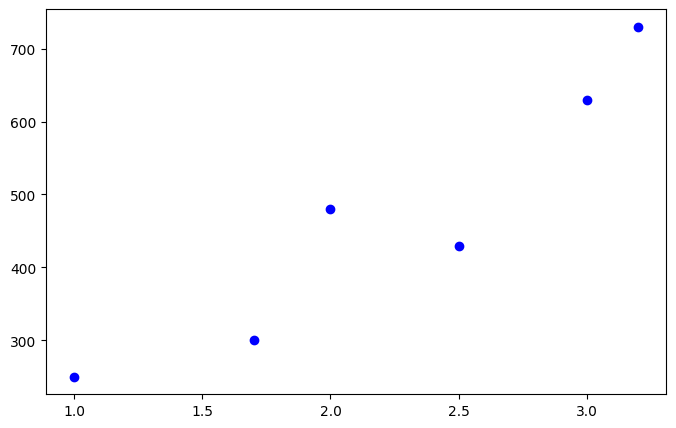

In [80]:
# plot points
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_train, y_train, 'bo')

In [81]:
# compute cost for different w and b
w_cand = np.arange(-100, 500, 10)
b_candid = np.arange(-300, 300, 10)
W, B = np.meshgrid(w_cand, b_candid)
gshape = B.shape

costs = np.zeros((gshape))
for i in range(gshape[0]):
    for j in range(gshape[1]):
        costs[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

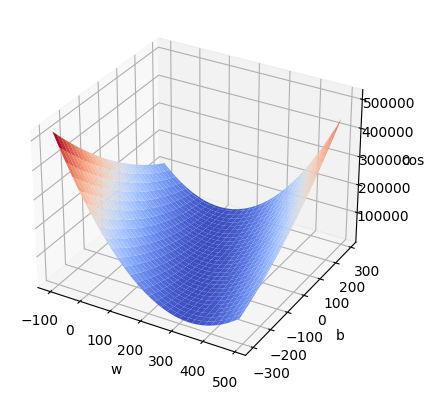

In [82]:
# Plot the surface. cost vs w_b
fig_s, ax_s = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax_s.plot_surface(W, B, costs, cmap=cm.coolwarm)
ax_s.set_xlabel('w')
ax_s.set_ylabel('b')
ax_s.set_zlabel('cost')

plt.show()

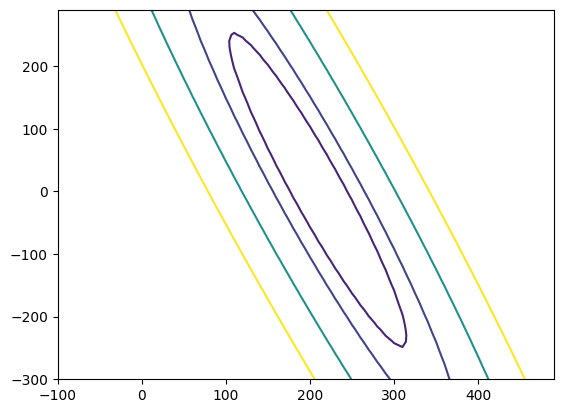

In [83]:
# plot cost contours
fig_c, ax_c = plt.subplots()
contours = [0.1, 50, 1000, 5000, 10000, 25000, 50000]
ax_c.contour(W, B, costs, contours)

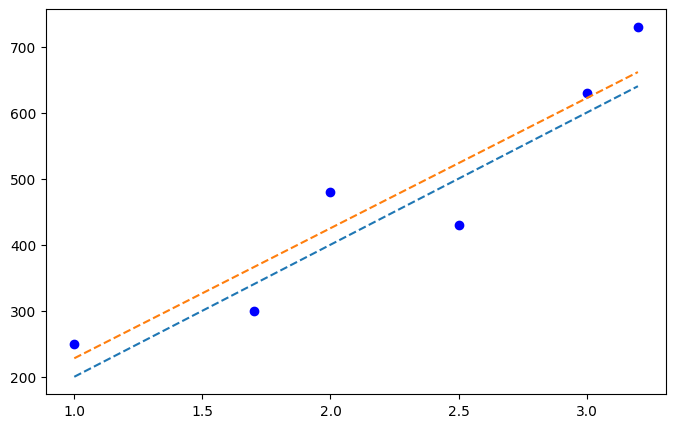

In [84]:
# plot prediction line - regression
y_pred = model(x_train, 200, 0)
y_pred_2 = model(x_train, 197, 31)
ax.plot(x_train, y_pred, '--')
ax.plot(x_train, y_pred_2, '--')
fig

In [85]:
# gradient
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]
    e = model(x, w, b) - y
    dw = (1/m) * e * x
    db = (1/m) * e
    dw = sum(dw)
    db = sum(db)
    return dw, db

In [86]:
# gradient descent
from copy import deepcopy


def gradient_descent(x, y, w_in=0, b_in=0, alpha=1, num_iters=100):

    w = deepcopy(w_in)
    b = deepcopy(b_in)
    p_history = [(w, b)]
    cost_history = [compute_cost(x, y, w, b)]  # J

    for i in range(num_iters):
        dw, db = compute_gradient(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        p_history.append((w, b))
        cost_history.append(compute_cost(x, y, w, b))
        if i % 100 == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ")

    return w, b, p_history, cost_history

In [87]:
# run gradient descent
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, p_history, cost_history = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
print("final cost", cost_history[-1])

Iteration    0: Cost 1.09e+05 
Iteration  100: Cost 1.96e+03 
Iteration  200: Cost 1.92e+03 
Iteration  300: Cost 1.89e+03 
Iteration  400: Cost 1.86e+03 
Iteration  500: Cost 1.84e+03 
Iteration  600: Cost 1.83e+03 
Iteration  700: Cost 1.81e+03 
Iteration  800: Cost 1.80e+03 
Iteration  900: Cost 1.79e+03 
(w,b) found by gradient descent: (197.4360, 31.6585)
final cost 1780.1971594317365


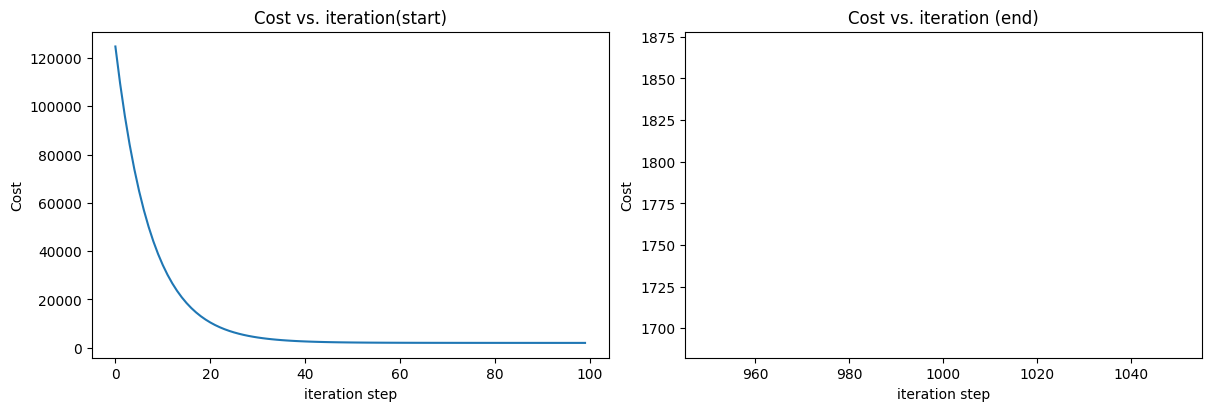

In [88]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()